## Setup

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

from sklearn import metrics

## Non-OPEC

### Production vs Prices

In [139]:
nonopec_prodvsprice = pd.read_csv("RiseorFall.csv", parse_dates = ['Date'], index_col = ['Date'])
nonopec_prodvsprice.head(5)

WTI   WTI - D  non-OPEC production change
Date                                                     
2001-01-01   $29.52      1.12                        0.72
2001-02-01   $29.57      0.05                        0.72
2001-03-01   $27.24     -2.33                        0.72
2001-04-01   $27.37      0.13                        0.48
2001-05-01   $28.61      1.24                        0.48

<AxesSubplot:>

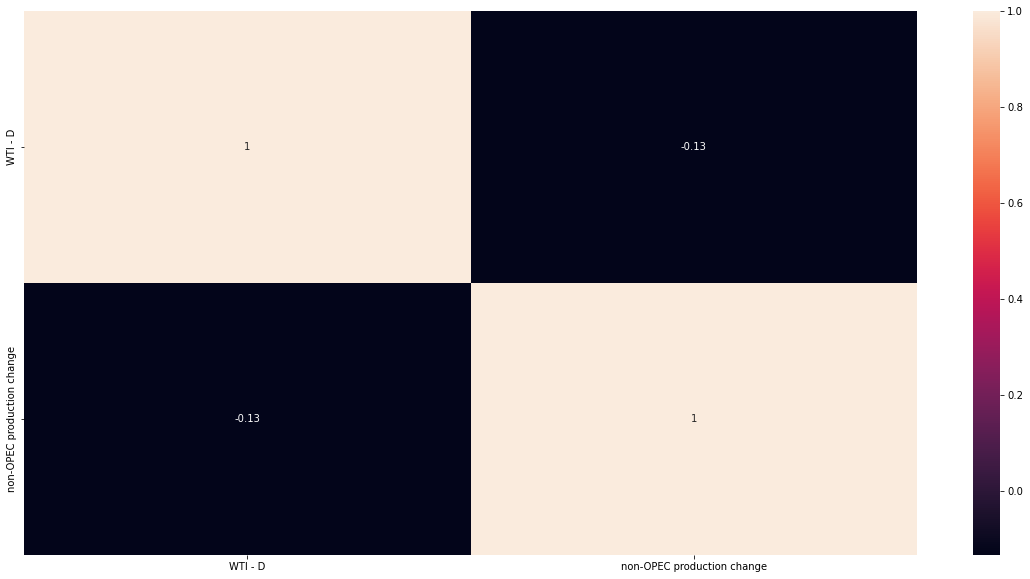

In [140]:
nonopec_prodvsprice_correlation = nonopec_prodvsprice.corr()
plt.figure(figsize = (20,10))
sns.heatmap(data = nonopec_prodvsprice_correlation, annot = True)

#Result: 13% negative correlation between non-opec production values and wti prices
#Action: track non-opec production 

### Natural Gas Production

## OPEC

### Production vs Price

<AxesSubplot:>

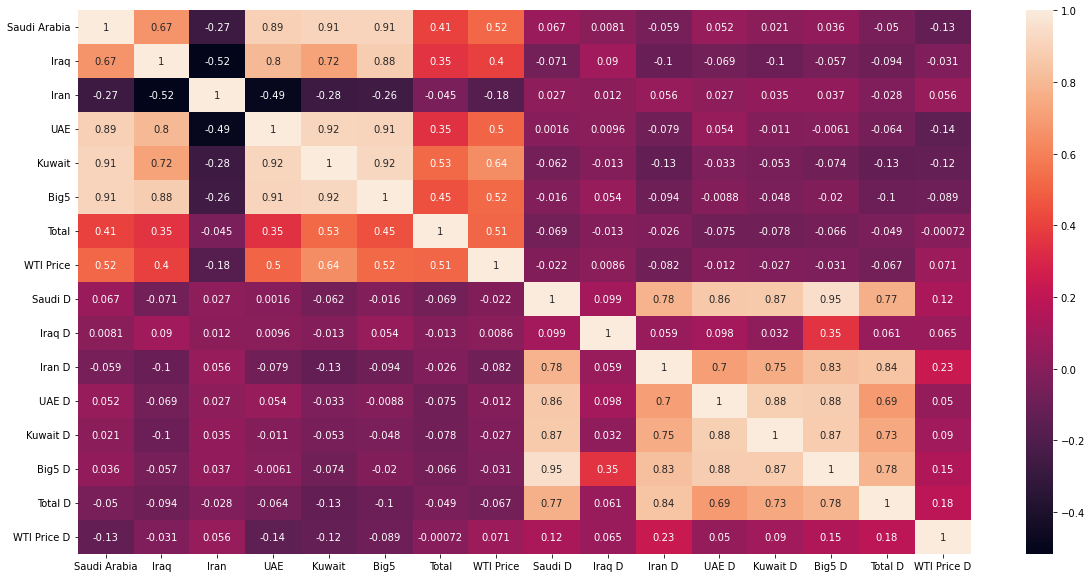

In [141]:
opec_prodvsprice = pd.read_csv("OPEC_ProductionvsPrice.csv", parse_dates = ['Month'], index_col = ['Month'])
opec_prodvsprice_correlation = opec_prodvsprice.corr()
plt.figure(figsize = (20,10))
sns.heatmap(data = opec_prodvsprice_correlation, annot = True)

#change in prices correlated with OPEC leaders movement, specifically Saudi, Iran, UAE, Kuwait, the big % have a 15% correlation with prices. 
#therefore: choose the big 5 to follow, follow Saudi because US politics

<AxesSubplot:>

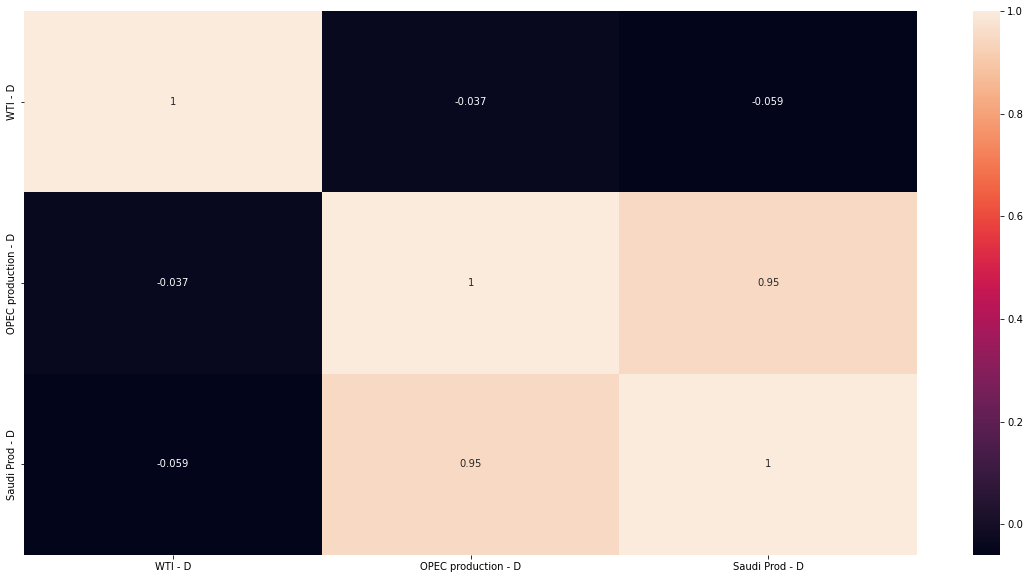

In [142]:
opec_prodvsprice = pd.read_csv("RiseorFall-OPEC.csv", parse_dates = ['Date'], index_col = ['Date'])
opec_prodvsprice_correlation = opec_prodvsprice.corr()
plt.figure(figsize = (20,10))
sns.heatmap(data = opec_prodvsprice_correlation, annot = True)

## Balances

### Inventory vs Future-Current Oil Prices

<AxesSubplot:>

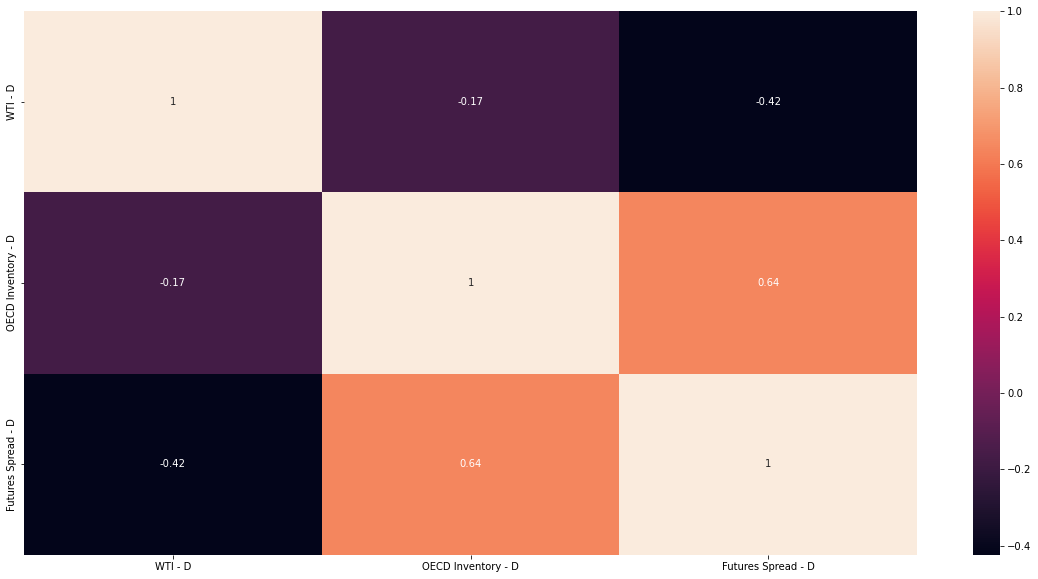

In [143]:
InventoryvsSpread = pd.read_csv("RiseorFall-OECDInventoryvsSpread.csv", parse_dates = ['Date'], index_col = ['Date'])
InventoryvsSpread_correlation = InventoryvsSpread.corr()
plt.figure(figsize = (20,10))
sns.heatmap(data = InventoryvsSpread_correlation, annot = True)

#Inventory decreases, price increases (-0.17)
#Inventory decreases, futures spread decreases (0.64)
#Futures spread decreases, WTI spot price increases (-0.42)

## Financial Markets

### Commodities

<AxesSubplot:>

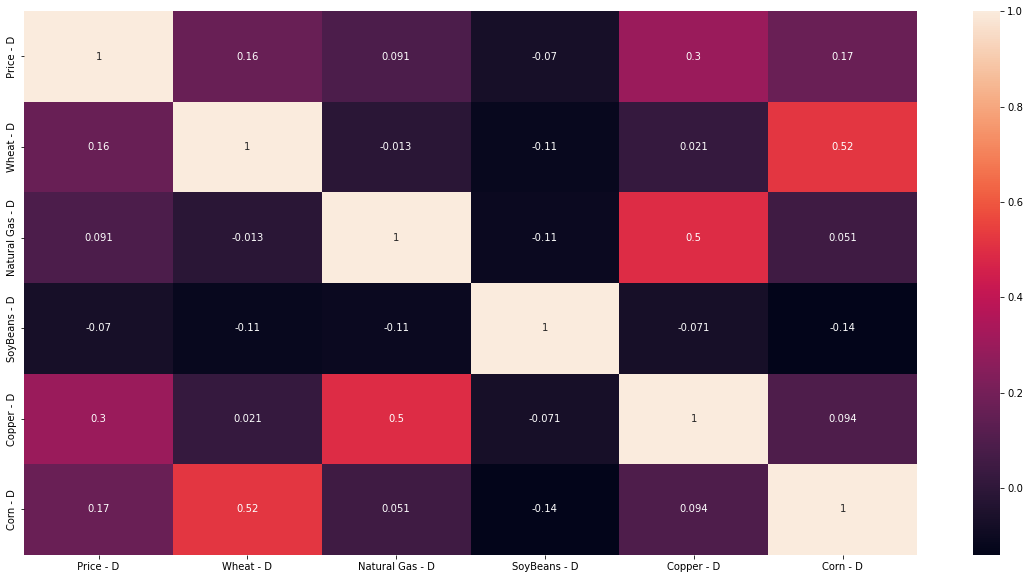

In [144]:
WTIvsCommodities = pd.read_csv("WTI vs Commodities.csv", parse_dates = ['Date'], index_col = ['Date'])
WTIvsCommodities_correlation = WTIvsCommodities.corr()
plt.figure(figsize = (20,10))
sns.heatmap(data = WTIvsCommodities_correlation, annot = True)

#Result: corn, copper, wheat most correlated, use those

<AxesSubplot:>

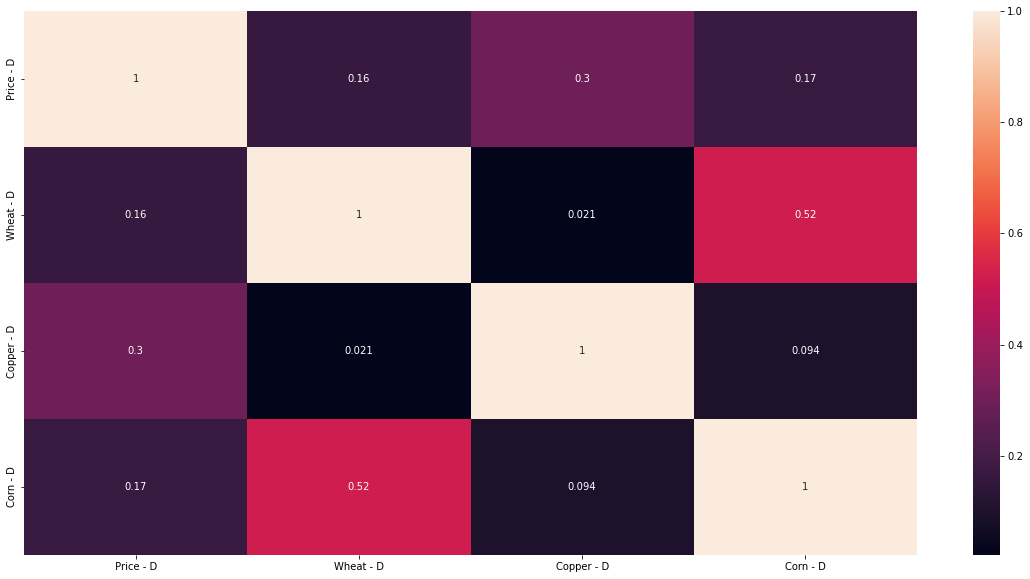

In [145]:
WTIvsCommodities = pd.read_csv("RiseorFall-Commodities.csv", parse_dates = ['Date'], index_col = ['Date'])
WTIvsCommodities_correlation = WTIvsCommodities.corr()
plt.figure(figsize = (20,10))
sns.heatmap(data = WTIvsCommodities_correlation, annot = True)

### Financial Instruments

<AxesSubplot:>

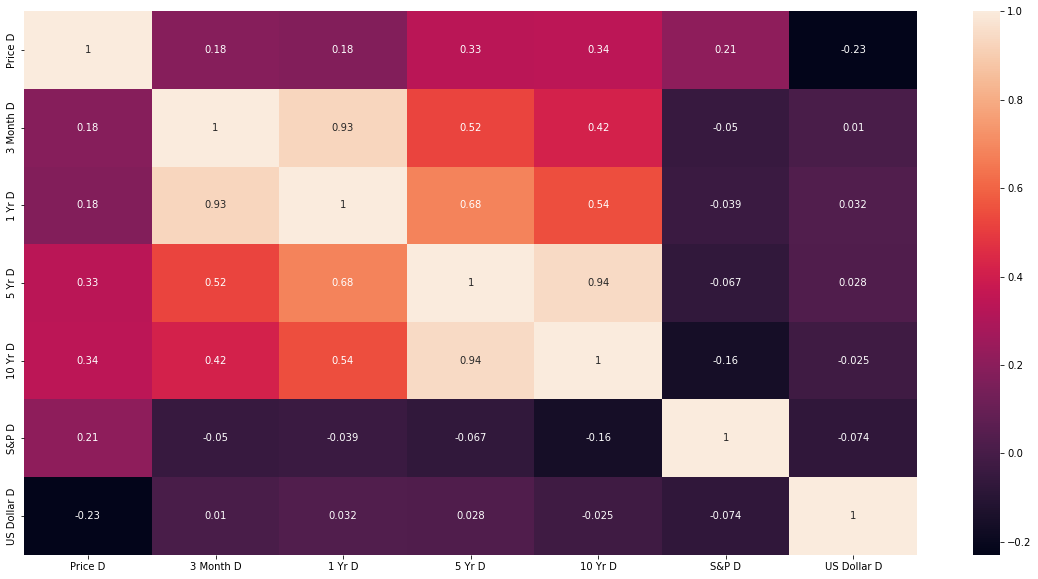

In [146]:
WTIvsBonds = opec_prodvsprice = pd.read_csv("WTI vs Bonds.csv", parse_dates = ['Date'], index_col = ['Date'])
WTIvsBonds_correlation = WTIvsBonds.corr()
plt.figure(figsize = (20,10))
sns.heatmap(data = WTIvsBonds_correlation, annot = True)

#Stocks (0.21), US dollar (-0.23), Bonds (short term)(0.34, 0.33)
#Stocks, dropped stocks because its volatile and lacks data before 2012 for S&P, should use for future predictions though


## Rise/Fall Model

In [147]:
model_data = pd.read_csv("RiseorFall-Master.csv", parse_dates = ['Date'], index_col = ['Date'])
x = model_data.drop('Rise/Fall (1/0)', axis = 1)
y = model_data['Rise/Fall (1/0)']

x_train, x_test, y_train, y_test = train_test_split (x,y, test_size = 0.2, train_size = 0.8, random_state = 42)

# x_train.head(2)
# y_train.head(2)

### Logistic

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

log_model = LogisticRegression(max_iter= 1000)

precision = cross_validate(log_model, x_train, y_train,  cv= 10, scoring = ('precision'))
recall = cross_validate(log_model, x_train, y_train,  cv= 10, scoring = ('recall') )
f1 = cross_validate(log_model, x_train, y_train,  cv= 10, scoring = ('f1') )
logloss = cross_validate(log_model, x_train, y_train,  cv= 10, scoring = ('neg_log_loss'))
accuracy = cross_validate(log_model, x_train, y_train,  cv= 10, scoring = ('accuracy'))

# print('Precision test scores:', precision['test_score'])
# print('Accuracy test scores:\n', accuracy['test_score'])
# print('Recall test scores:', recall['test_score'])
# print('F1 test scores:', f1['test_score'])
# print('Log Loss test scores:\n', logloss['test_score'])

print('\nAverage Precision test scores:', precision['test_score'].mean())
print('Average Accuracy test scores:', accuracy['test_score'].mean())
print('Average Recall test scores:', recall['test_score'].mean())
print('Average F1 test scores:', f1['test_score'].mean())
print('Average Log Loss test scores:', logloss['test_score'].mean()) 



Average Precision test scores: 0.6355536130536129
Average Accuracy test scores: 0.6057142857142856
Average Recall test scores: 0.7722222222222223
Average F1 test scores: 0.6943113912231558
Average Log Loss test scores: -0.6529944555579923


### Linear Discriminant Analysis

In [149]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

disc_anal = LinearDiscriminantAnalysis()
precision = cross_validate(disc_anal, x_train, y_train,  cv= 10, scoring = ('precision'))
recall = cross_validate(disc_anal, x_train, y_train,  cv= 10, scoring = ('recall') )
f1 = cross_validate(disc_anal, x_train, y_train,  cv= 10, scoring = ('f1') )
accuracy = cross_validate(disc_anal, x_train, y_train,  cv= 10, scoring = ('accuracy'))
logloss = cross_validate(disc_anal, x_train, y_train,  cv= 10, scoring = ('neg_log_loss') )

# print('Precision test scores:', precision['test_score'])
# print('Accuracy test scores:\n', accuracy['test_score'])
# print('Recall test scores:', recall['test_score'])
# print('F1 test scores:', f1['test_score'])
# print('Log Loss test scores:\n', logloss['test_score'])

print('\nAverage Precision test scores:', precision['test_score'].mean())
print('Average Accuracy test scores:', accuracy['test_score'].mean())
print('Average Recall test scores:', recall['test_score'].mean())
print('Average F1 test scores:', f1['test_score'].mean())
print('Average Log Loss test scores:', logloss['test_score'].mean()) 


Average Precision test scores: 0.632472804972805
Average Accuracy test scores: 0.5985714285714285
Average Recall test scores: 0.7833333333333333
Average F1 test scores: 0.6965998217468806
Average Log Loss test scores: -0.6996764924191801


### Naive Bayes

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
precision = cross_validate(NB, x_train, y_train,  cv= 10, scoring = ('precision'))
recall = cross_validate(NB, x_train, y_train,  cv= 10, scoring = ('recall') )
f1 = cross_validate(NB, x_train, y_train,  cv= 10, scoring = ('f1') )
accuracy = cross_validate(NB, x_train, y_train,  cv= 10, scoring = ('accuracy'))
logloss = cross_validate(NB, x_train, y_train,  cv= 10, scoring = ('neg_log_loss') )

# print('Precision test scores:', precision['test_score'])
# print('Accuracy test scores:\n', accuracy['test_score'])
# print('Recall test scores:', recall['test_score'])
# print('F1 test scores:', f1['test_score'])
# print('Log Loss test scores:\n', logloss['test_score'])

print('\nAverage Precision test scores:', precision['test_score'].mean())
print('Average Accuracy test scores:', accuracy['test_score'].mean())
print('Average Recall test scores:', recall['test_score'].mean())
print('Average F1 test scores:', f1['test_score'].mean())
print('Average Log Loss test scores:', logloss['test_score'].mean()) 


Average Precision test scores: 0.6429365079365079
Average Accuracy test scores: 0.5428571428571429
Average Recall test scores: 0.4708333333333333
Average F1 test scores: 0.5361516914458091
Average Log Loss test scores: -1.4428660365535337


### SVC

In [172]:
from sklearn.svm import SVC
from sklearn import svm

SVC_List = []

SVC1 = svm.SVC(C=0.5, kernel = 'linear')
SVC1.fit(x_train, y_train)
SVC_List.append(SVC1)

# SVC2 = svm.SVC(C=1, kernel = 'linear')
# SVC2.fit(x_train, y_train)
# SVC_List.append(SVC2)

# SVC3 = svm.SVC(C=2, kernel = 'linear')
# SVC3.fit(x_train, y_train)
# SVC_List.append(SVC3)

# SVC4 = svm.SVC(C=0.5, kernel = 'rbf')
# SVC4.fit(x_train, y_train)
# SVC_List.append(SVC4)

# SVC5 = svm.SVC(C=1, kernel = 'rbf')
# SVC5.fit(x_train, y_train)
# SVC_List.append(SVC5)

# SVC6 = svm.SVC(C=2, kernel = 'rbf')
# SVC6.fit(x_train, y_train)
# SVC_List.append(SVC6)

# SVC7 = svm.SVC(C= 0.5 , kernel = 'poly', degree = 2 )
# SVC7.fit(x_train, y_train)
# SVC_List.append(SVC7)

# SVC8 = svm.SVC(C= 0.5 , kernel = 'poly', degree = 3 )
# SVC8.fit(x_train, y_train)
# SVC_List.append(SVC8)

# SVC9 = svm.SVC(C= 0.5 , kernel = 'poly', degree = 5 )
# SVC9.fit(x_train, y_train)
# SVC_List.append(SVC9)

# SVC10 = svm.SVC(C= 1 , kernel = 'poly', degree = 2  )
# SVC10.fit(x_train, y_train)
# SVC_List.append(SVC10)

# SVC11 = svm.SVC(C= 1, kernel = 'poly', degree = 3 )
# SVC11.fit(x_train, y_train)
# SVC_List.append(SVC11)

# SVC12 = svm.SVC(C= 1, kernel = 'poly', degree = 5 )
# SVC12.fit(x_train, y_train)
# SVC_List.append(SVC12)

# SVC13 = svm.SVC(C= 2, kernel = 'poly', degree = 2 )
# SVC13.fit(x_train, y_train)
# SVC_List.append(SVC13)

# SVC14 = svm.SVC(C= 2, kernel = 'poly', degree = 3 )
# SVC14.fit(x_train, y_train)
# SVC_List.append(SVC14)

# SVC15 = svm.SVC(C= 2, kernel = 'poly', degree = 5 )
# SVC15.fit(x_train, y_train)
# SVC_List.append(SVC15)

for n in SVC_List:
    cross_val = cross_validate(n, x_train, y_train, cv = 5, scoring = "f1")
    average_score = cross_val["test_score"].mean()
    print("Average F1 Test Score of", n, "=", average_score)

for n in SVC_List:
    cross_val = cross_validate(n, x_train, y_train, cv = 5, scoring = "accuracy")
    average_score = cross_val["test_score"].mean()
    print("Average Accuracy Test Score of", n, "=", average_score)



C:\Users\jusxp\anaconda3\envs\498A\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jusxp\anaconda3\envs\498A\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\jusxp\anaconda3\envs\498A\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\jusxp\anaconda3\envs\498A\lib\site-packages\sklearn\metrics\_scorer.py", line 298, in _score
    y_pred = method_caller(clf, "predict_proba", X)
  File "C:\Users\jusxp\anaconda3\envs\498A\lib\site-packages\sklearn\metrics\_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\jusxp\anaconda3\envs\498A\lib\site-packages\sklearn\utils\metaestimators.py", line 109, in __ge

Average F1 Test Score of SVC(C=0.5, kernel='linear') = nan
Average Accuracy Test Score of SVC(C=0.5, kernel='linear') = 0.5844827586206895


### Best Model

Confusion Matrix:
 [[ 6 10]
 [ 5 15]]


C:\Users\jusxp\anaconda3\envs\498A\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


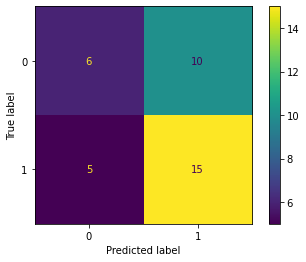

In [166]:
# Best model is: Average F1 Test Score of SVC(C=1, degree=2, kernel='poly') = 0.7357079567605883
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#best_model = svm.SVC(C= 1 , degree = 2, kernel = 'poly')
#best_model = LinearDiscriminantAnalysis()
best_model = LogisticRegression(max_iter= 1000)
best_model.fit(x_train, y_train)

y_predict = best_model.predict(x_test)
confusion = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:\n", confusion)
plot_confusion_matrix(best_model, x_test, y_test)


## Price Delta Model

### Comparing Different Prices

<AxesSubplot:xlabel='Date'>

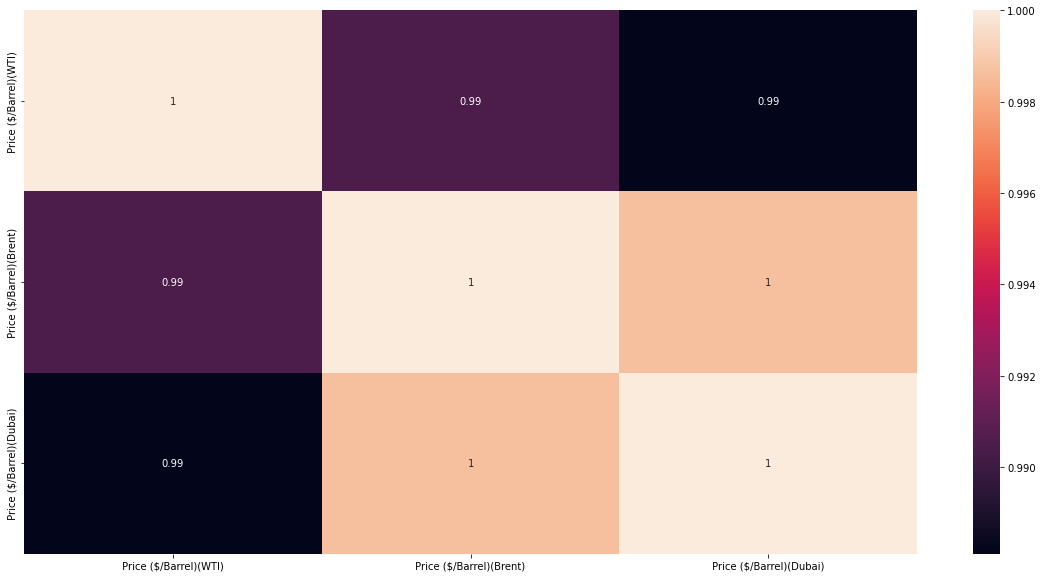

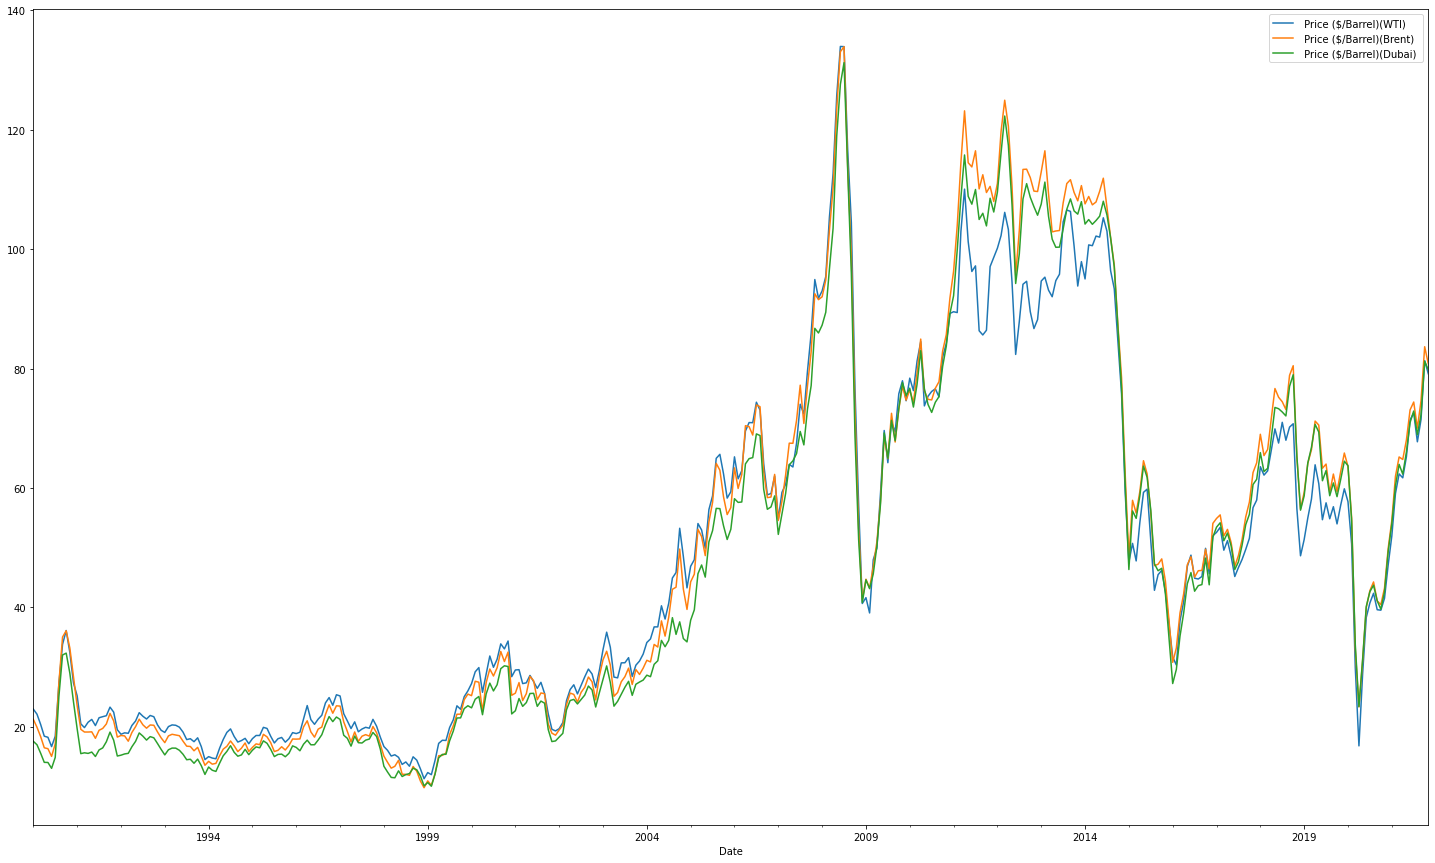

In [153]:
oil_prices = pd.read_csv("Oil Prices- WTI vs Others.csv", parse_dates = ['Date'], index_col = ['Date'])
oil_price_correlation = oil_prices.corr()
plt.figure(figsize = (20,10))
sns.heatmap(data = oil_price_correlation, annot = True)
oil_prices.plot(figsize = (25,15) )
#Findings: very largely correlated with each other as expected

### Delta Model

In [154]:
price_model_data = pd.read_csv("RiseorFall-MasterDelta.csv", parse_dates = ['Date'], index_col = ['Date'])

X = price_model_data.drop('WTI - D', axis = 1)
Y = price_model_data['WTI - D']

X_train, X_test, Y_train, Y_test = train_test_split (X,Y, test_size = 0.2, train_size = 0.8, random_state = 42)

#x_train.head(2)
#y_train.head(2)

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.svm import SVR 
from sklearn.metrics import mean_squared_error, r2_score

In [156]:
#Linear Regression
model = LinearRegression()
RMSE_cross = cross_validate(model, X_train, Y_train, cv = 10, scoring = ('neg_mean_squared_error'))
R2_cross = cross_validate(model, X_train, Y_train, cv = 10, scoring = ('r2'))
#print('R2 test scores:', R2_cross['test_score'])
print('\nAverage R2 test scores:', R2_cross['test_score'].mean())
#print('\nRMSE test scores:', RMSE_cross['test_score'])
print('\nAverage RMSE test scores:', RMSE_cross['test_score'].mean())


Average R2 test scores: 0.05130092289194529

Average RMSE test scores: -32.28874935312299


In [157]:
#Lasso

model = Lasso(max_iter= 1000)
RMSE_cross = cross_validate(model, X_train, Y_train, cv = 10, scoring = ('neg_mean_squared_error'))
R2_cross = cross_validate(model, X_train, Y_train, cv = 10, scoring = ('r2'))
#print('R2 test scores:', R2_cross['test_score'])
print('\nAverage R2 test scores:', R2_cross['test_score'].mean())
#print('\nRMSE test scores:', RMSE_cross['test_score'])
print('\nAverage RMSE test scores:', RMSE_cross['test_score'].mean())


Average R2 test scores: 0.12219212770036118

Average RMSE test scores: -30.58169980839413


In [158]:
#Ridge

model = Ridge(max_iter= 1000)
RMSE_cross = cross_validate(model, X_train, Y_train, cv = 10, scoring = ('neg_mean_squared_error'))
R2_cross = cross_validate(model, X_train, Y_train, cv = 10, scoring = ('r2'))
#print('R2 test scores:', R2_cross['test_score'])
print('\nAverage R2 test scores:', R2_cross['test_score'].mean())
#print('\nRMSE test scores:', RMSE_cross['test_score'])
print('\nAverage RMSE test scores:', RMSE_cross['test_score'].mean())


Average R2 test scores: 0.12407844901212044

Average RMSE test scores: -29.66161083227209



Average R2 test scores: 0.12407844901212044

Average RMSE test scores: -29.66161083227209


<Figure size 14400x14400 with 0 Axes>

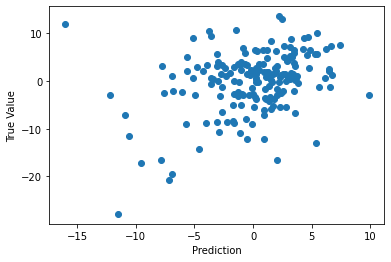

<Figure size 14400x14400 with 0 Axes>

In [164]:
from sklearn.model_selection import cross_val_predict
best_delta_model = Ridge(max_iter = 1000)
y_crossval_predict = cross_val_predict(best_delta_model, X, Y, cv = 10)

RMSE_cross = cross_validate(best_delta_model, X_train, Y_train, cv = 10, scoring = ('neg_mean_squared_error'))
R2_cross = cross_validate(best_delta_model, X_train, Y_train, cv = 10, scoring = ('r2'))
#print('R2 test scores:', R2_cross['test_score'])
print('\nAverage R2 test scores:', R2_cross['test_score'].mean())
#print('\nRMSE test scores:', RMSE_cross['test_score'])
print('\nAverage RMSE test scores:', RMSE_cross['test_score'].mean())

plt.scatter(y_crossval_predict, Y )
plt.xlabel("Prediction")
plt.ylabel("True Value")
plt.figure(figsize= (200,200))
